# Lab No 4: Geovisualization II - Apps.
# PART TWO
## 3 Challenges

# Challenge No 2

In [ ]:
# Here is the code for challenge 2, Lab 4

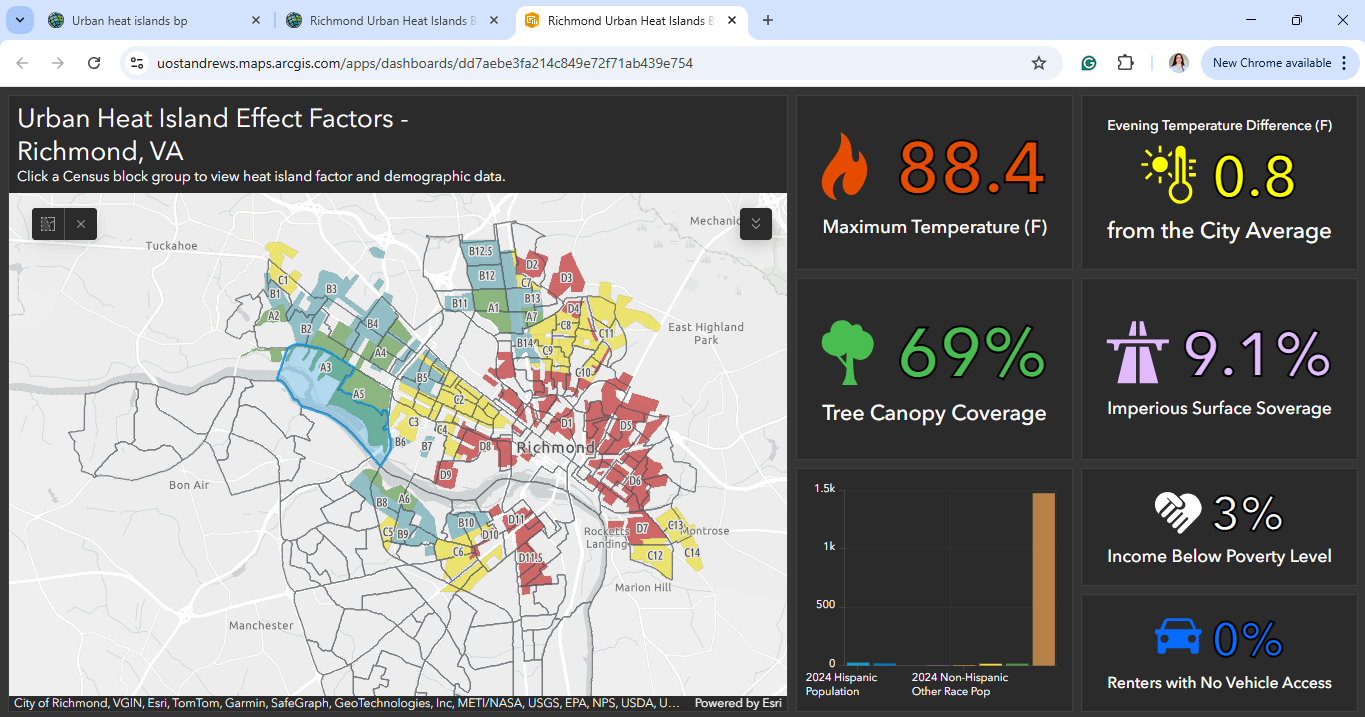

https://www.arcgis.com/apps/dashboards/dd7aebe3fa214c849e72f71ab439e754

# Challenge No 3

In [ ]:
# Here is the code for challenge 3, Lab 4

In [ ]:
import requests
import zipfile
import os
import pandas as pd
import geopandas as gpd

#downloading shapefile
url = "https://maps.gov.scot/ATOM/shapefiles/SG_SIMD_2020.zip"
zip_path = "SG_SIMD_2020.zip"
extract_path = "SG_SIMD_2020"
with open(zip_path, "wb") as f:
    f.write(requests.get(url).content)

#unzipping shapefile
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

#loading the shapefile into our gdf
shapefile = [f for f in os.listdir(extract_path) if f.endswith(".shp")][0]
gdf = gpd.read_file(os.path.join(extract_path, shapefile))

#printing the first five rows of data
print(gdf.head())

**References**: bytecode (2024). Reading multiple shapefiles with geopandas from a zip file in memory. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/77823335/reading-multiple-shapefiles-with-geopandas-from-a-zip-file-in-memory.

In [ ]:
#subset our data frame to keep only data for edinburgh city 

gdf_subset == gdf[gdf["LAName"] == "City of Edinburgh"]
gdf_subset.head(3)

In [ ]:
#seeing the column titles
gdf_subset.columns

In [ ]:
#using matplot lib to create chloropleth maps 
import numpy as np
import mapclassify as mc
import matplotlib.pyplot as plt
import folium
import seaborn as sns

#choosing my axes for the chloropleth map
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#exploring different variables through generating histograms
sns.histplot(data=gdf_subset, x="IncRate",ax=axes[0], kde=True) 
sns.histplot(data=gdf_subset, x="EduAttend",ax=axes[1], kde=True) 
sns.histplot(data=gdf_subset, x="CrimeRate",ax=axes[2], kde=True) 

axes[0].set_title("Income Rate")
axes[1].set_title("Educational Attendance")
axes[2].set_title("Crime Rate")

plt.tight_layout()
plt.show()

In [ ]:
#checking for any missing values
print(gdf_subset['IncRate'].isna().sum())
print(gdf_subset['EduAttend'].isna().sum())
print(gdf_subset['CrimeRate'].isna().sum())

In [ ]:
#checking the data types
print(gdf_subset['IncRate'].dtype)
print(gdf_subset['EduAttend'].dtype)
print(gdf_subset['CrimeRate'].dtype)

In [ ]:
# number of classes for classification
num_classes = 5

# using natural breaks (jenks classification)
classifier_nb = mc.NaturalBreaks(gdf_subset['CrimeRate'], k=num_classes)
print(classifier_nb)
print(min(classifier_nb.bins), max(classifier_nb.bins))
print(classifier_nb.bins) #

# using equal interval classification
classifier_ei = mc.EqualInterval(gdf_subset['CrimeRate'], k=num_classes)
print(classifier_ei)
print(min(classifier_ei.bins), max(classifier_ei.bins))
print(classifier_ei.bins) 

In [ ]:
#creating a histogram with breakpoints for the crime rate in Edinburgh

fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=gdf_subset, x="CrimeRate", ax=ax, kde=True, bins=20)

# defining the style of the lines to represent the breakpoints
ax.axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Breakpoints') 
# a simple For to loop over all the elements in the array 'classifier_nb.bins'
for bin_value in classifier_nb.bins:
    ax.axvline(bin_value, color='red', linestyle='dashed', linewidth=2) 
 
#styling the histogram
ax.set_title("Histogram with Breakpoints for Natural Breaks")

#adding a legend
plt.legend()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#generating histogram for crime rates in Edinburgh with natural breaks
sns.histplot(data=gdf_subset, x="CrimeRate", ax=axes[0], kde=True, bins=20)
axes[0].axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Natural Breaks')
for bin_value in classifier_nb.bins:
    axes[0].axvline(bin_value, color='red', linestyle='dashed', linewidth=2)
axes[0].set_title("Crime Rate Histogram with Natural Breaks")
axes[0].legend()

sns.histplot(data=gdf_subset, x="CrimeRate", ax=axes[1], kde=True, bins=20)
axes[1].axvline(classifier_ei.bins[0], color='blue', linestyle='dashed', linewidth=2, label='Quantiles')
for bin_value in classifier_ei.bins:
    axes[1].axvline(bin_value, color='blue', linestyle='dashed', linewidth=2)
axes[1].set_title("Crime Rate Histogram with Quantiles")
axes[1].legend()
#using the tight layout to display the histogram with natural breaks
plt.tight_layout()
plt.show()

In [ ]:
#generating a chloropleth map with natural breaks                                                                                                                                        fig, ax = plt.subplots(figsize=(12, 10))
gdf_subset.plot(column='CrimeRate', ax=ax,
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins} 
        )
plt.title("Choropleth Map using mapclassify with Natural Breaks - Map 1")
plt.show()

In [ ]:
#generating a chloropleth map with equal intervals
fig, ax = plt.subplots(figsize=(12, 10))
gdf_subset.plot(column='CrimeRate', ax=ax,
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins},
        )
plt.title("Choropleth Map using Classifier with Equal Intervals - Map 2")
plt.show()

In [ ]:
#comparing the two chloropleth maps for crime rates in Edinburgh
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

gdf_subset.plot(column='CrimeRate', ax=axs[0],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins}
        )

axs[0].set_title("Choropleth Map with Natural Breaks")

gdf_subset.plot(column='CrimeRate', ax=axs[1],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins})

axs[1].set_title("Choropleth Map with Equal Intervals")
#using the tight layout
plt.tight_layout() 
plt.show()

In [ ]:
#creating chloropleth mapbox using natural breaks
num_classes = 5

classifier_edi = mc.NaturalBreaks(gdf_subset['CrimeRate'], k=num_classes)
gdf_subset['classification_edi'] = classifier_edi.yb #yb to get the values from the array.

print(classifier_edi)
print(gdf_subset[['CrimeRate', 'classification_nb']])

In [ ]:
fig = px.choropleth_mapbox(gdf_subset,
                           geojson=gdf_subset.geometry,
                           locations=gdf_subset.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#checking for the LA name for glasgow
print(gdf["LAName"].unique()) 

In [ ]:
#comparing glasgow and edinburgh 

#creating a subset for glasgow to compare to edinburgh
gdf_subset2 == gdf[gdf["LAName"] == "Glasgow City"]
gdf_subset2.head(3)

In [ ]:
#observing the columns
gdf_subset2.columns

In [ ]:
#generating a mapbox for Glasgow crime rate
num_classes = 5

classifier_gla = mc.NaturalBreaks(gdf_subset2['CrimeRate'], k=num_classes)
gdf_subset2['classification_gla'] = classifier_nb.yb #yb to get the values from the array.

print(classifier_gla)
print(gdf_subset2[['CrimeRate', 'classification_nb']])

In [ ]:
fig = px.choropleth_mapbox(gdf_subset2,
                           geojson=gdf_subset2.geometry,
                           locations=gdf_subset2.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#comparing the mapbox for Glasgow vs Edinburgh's crime rate
ig = make_subplots(rows=1, cols=2, subplot_titles=("Glasgow Crime Rate", "Edinburgh Crime Rate"),
                    specs=[[{"type": "mapbox"}, {"type": "mapbox"}]])

#combining both figures
fig.add_trace(fig_glasgow.data[0], row=1, col=1)
fig.add_trace(fig_edinburgh.data[0], row=1, col=2)

#updating the layout
fig.update_layout(mapbox_style="carto-positron",
                  margin={"r":0,"t":50,"l":0,"b":0},
                  height=600,
                  showlegend=False)
#displaying the figure
fig.show()